## Credit Card Fraud Detection

In [1]:
# import relevant libraries
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# cross validation and hyperparameter tuning
import six
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# model evaluation
from sklearn import metrics

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# set other options
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)

## 1. Data Understanding

In [2]:
# load the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check shape
print('Rows    : {0} \nColumns : {1}'.format(df.shape[0], df.shape[1]))

Rows    : 284807 
Columns : 31


#### There are 31 columns and around 2.85 lakh records

In [4]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### All are numeric features

In [5]:
# check if any row has all the values as missing
df[df.isnull().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [6]:
# check for missing values across columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no missing values in the data set

In [7]:
# check for duplicated data
dup_df = df[df.duplicated(keep='first')]
print('Dupilcated rows:', dup_df.shape[0])
print('Percentage of dupilcated data: {0} %'.format(round(100*(dup_df.shape[0]/df.shape[0]),2)))

Dupilcated rows: 1081
Percentage of dupilcated data: 0.38 %


In [8]:
# check class label of duplicated data
dup_df['Class'].value_counts()

0    1062
1      19
Name: Class, dtype: int64

#### The percentage of duplicated data and the class distribution is less. These rows can be deleted.

In [9]:
# save number of original rows
actual_rows = df.shape[0]

# drop the duplicate rows
df.drop_duplicates(keep='first', inplace=True)

# check shape again
print('Rows    : {0} \nColumns : {1}'.format(df.shape[0], df.shape[1]))
print('Percentage of data left: {0} %'.format(round(100*(df.shape[0]/actual_rows),2)))

Rows    : 283726 
Columns : 31
Percentage of data left: 99.62 %


## 2. Exploratory data analysis

### 2.1 Class distribution

In [10]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100, 2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)

print('Fradulent transactions (Label 1)     : {0} % ({1})'.format(fraud_share, classes[1]))
print('Non-Fradulent transactions (Label 0) : {0} % ({1})'.format(normal_share, classes[0]))

Fradulent transactions (Label 1)     : 0.17 % (473)
Non-Fradulent transactions (Label 0) : 99.83 % (283253)


#### There is huge data imbalance with positive class (frauds) accounting to 0.17 %

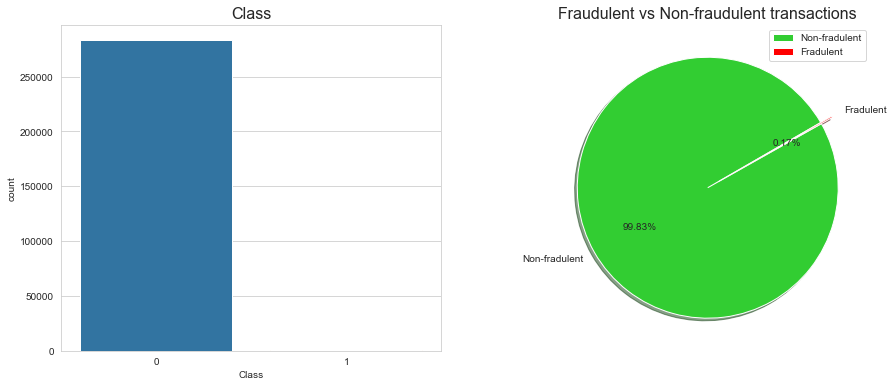

In [11]:
# Create plots for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(df['Class'])
plt.title('Class', fontsize=16)

plt.subplot(122)
plt.title('Fraudulent vs Non-fraudulent transactions', fontsize=16)
plt.pie(x=[normal_share,fraud_share], explode=[0,0.1],labels=['Non-fradulent','Fradulent'],
        autopct='%1.2f%%', colors=['limegreen', 'red'], startangle=30, shadow=True)
plt.legend(loc='best')

plt.show()

In [12]:
# Descriptive statistics for variable 'Time' and 'Amount'
df[['Time', 'Amount']].describe()

,Time,Amount
count,283726.000000,283726.000000
mean,94811.077600,88.472687
std,47481.047891,250.399437
min,0.000000,0.000000
25%,54204.750000,5.600000
50%,84692.500000,22.000000
75%,139298.000000,77.510000
max,172792.000000,25691.160000


#### Insights:
1. Transactions happen at every **94,811 secs**, on an average.
2. Average transaction amount is **88.47 euros**. Min and max amounts are 0 and 25,691 euros respectively.
3. By seeing the 75th percetile and the maximum value, the 'Amount' variables looks highly **positively skewed**

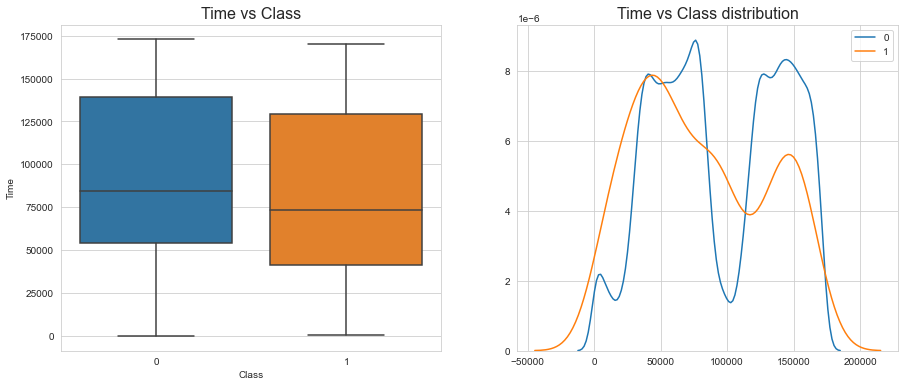

In [13]:
# Create plots to observe the distribution of classes with time

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Time vs Class', fontsize=16)
sns.boxplot(x='Class', y='Time', data=df)

plt.subplot(122)
plt.title('Time vs Class distribution', fontsize=16)
sns.distplot(df.loc[df['Class']==0][['Time']],hist=False,label='0')
sns.distplot(df.loc[df['Class']==1][['Time']], hist=False, label='1')

plt.show()

The distribution of the fraudulent transactions indicate that they kept increasing till the 13th hour of the first day and then slowed down for the next 14 hours and then increased again for the next 7 hours and spiked down again.

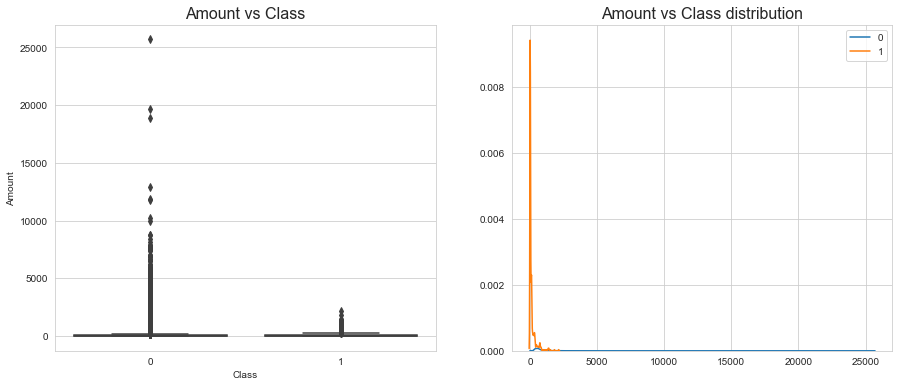

In [14]:
# Create plots to observe the distribution of classes with Amount

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Amount vs Class', fontsize=16)
sns.boxplot(x='Class', y='Amount', data=df)

plt.subplot(122)
plt.title('Amount vs Class distribution', fontsize=16)
sns.distplot(df.loc[df['Class']==0][['Amount']],hist=False,label='0')
sns.distplot(df.loc[df['Class']==1][['Amount']], hist=False, label='1')

plt.show()

All of the fraudulent transactions have happened for amount less than 5000 euros. Also, the plot shows that there is skewness present in the amount feature.

### 2.2 Time vs Amount distribution w.r.t. classes

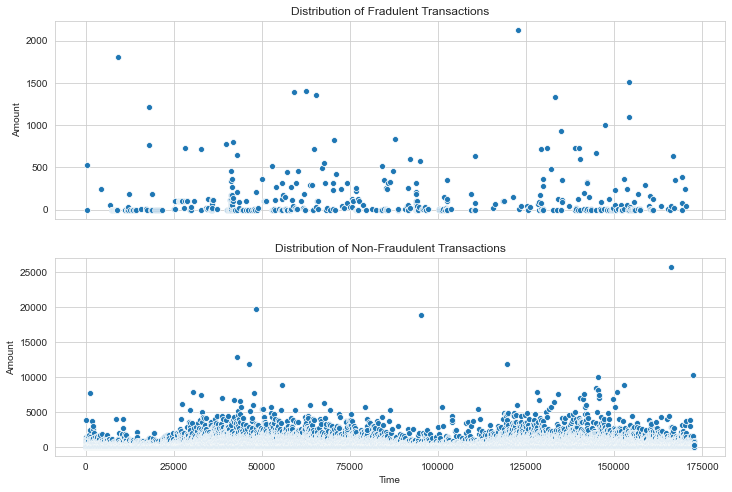

In [15]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(12,8))

sns.scatterplot(x='Time', y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title('Distribution of Fradulent Transactions')
sns.scatterplot(x='Time', y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title('Distribution of Non-Fraudulent Transactions')

plt.show()

### 2.3 Correlations

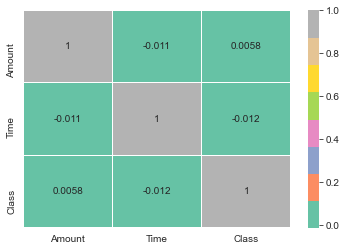

In [16]:
# check correlations
cor = df[['Amount', 'Time', 'Class']].corr()
sns.heatmap(cor, annot=True, cmap='Set2', linecolor='w', linewidths=0.3)
plt.show()

`None of the raw features are highly correlated with each other.`

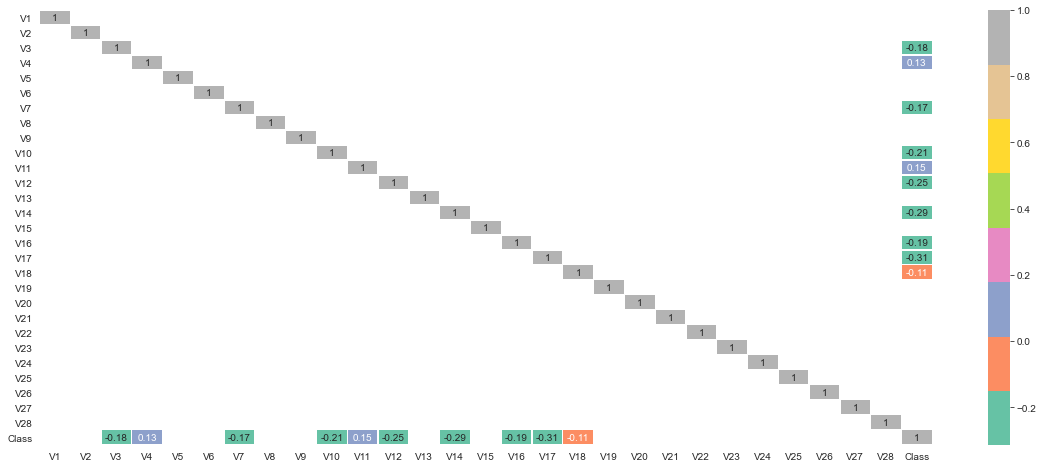

In [17]:
# check correlations of pca features along with class variable
pca_features = [f for f in df.columns if f.startswith('V')]
cor = df[pca_features + ['Class']].corr()
cor_new = cor[(cor > 0.10) | (cor < -0.10)]
plt.figure(figsize=(20,8))
sns.heatmap(cor_new, annot=True, cmap='Set2', linecolor='w', linewidths=0.3)
plt.show()

#### Insights
- No high positive correlations found. Although, V4 and V11 have postive correlations greater than 10% and less than 15%.
- V3, V7, V10, V12, V14, V16 & V17 are negatively correlated with values greater than negative 15%. It states that lower these values are, more likely the chances of fraud.
- These results are obtained from the imbalanced dataset. A similar correlation will be plotted after data balancing.

### 2.4 Feature engineering on 'Time'

In [18]:
import math

In [19]:
# convert Time from seconds to hours
df['Time'] = df['Time']/3600

In [20]:
# calculate hour of the day
df['Hour'] = df['Time']%24
df['Hour'] = df['Hour'].apply(lambda x: math.floor(x))

In [21]:
# calculate day 1 and day 2
df['Day'] = df['Time']/24
df['Day'] = df['Day'].apply(lambda x: 1 if x==0 else math.ceil(x))

In [22]:
# check head
df[['Time', 'Day', 'Hour']].head()

,Time,Day,Hour
0,0.000000,1,0
1,0.000000,1,0
2,0.000278,1,0
3,0.000278,1,0
4,0.000556,1,0


In [23]:
# check tail
df[['Time', 'Day', 'Hour']].tail()

,Time,Day,Hour
284802,47.996111,2,23
284803,47.996389,2,23
284804,47.996667,2,23
284805,47.996667,2,23
284806,47.997778,2,23


In [24]:
# calculate total transactions day-wise
day_total = df.groupby('Day')['Class'].count().reset_index(name='Total')
day_total

,Day,Total
0,1,144237
1,2,139489


In [25]:
# calculate fraud transactions day-wise
day_fraud = df.groupby('Day')['Class'].sum().reset_index(name='Fraud')
day_fraud

,Day,Fraud
0,1,272
1,2,201


In [26]:
# merge and calculate % fraudulent transactions day-wise
day_df = day_total.merge(day_fraud, on='Day')
day_df['Non-Fraud'] = day_df['Total'] - day_df['Fraud']
day_df['Fraud_per'] = round(100*(day_df['Fraud'] / day_df['Total']),2)
day_df

,Day,Total,Fraud,Non-Fraud,Fraud_per
0,1,144237,272,143965,0.19
1,2,139489,201,139288,0.14


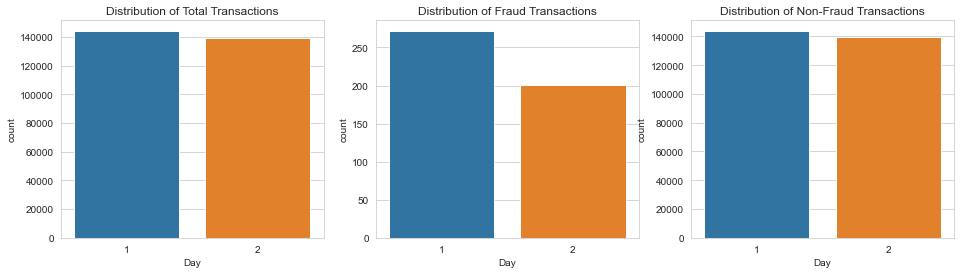

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(16,4))

sns.countplot(df['Day'], ax=axs[0])
axs[0].set_title("Distribution of Total Transactions")

sns.countplot(df[(df['Class'] == 1)]['Day'], ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")

sns.countplot(df[(df['Class'] == 0)]['Day'], ax=axs[2])
axs[2].set_title("Distribution of Non-Fraud Transactions")

plt.show()

#### Insights
1. Day-1 fraud transactions: **272** with **0.19%** of total transactions happened on day 1
2. Day-2 fraud transactions: **201** with **0.14%** of total transactions happened on day 2
3. There were more fraudulent transactions on day 1 compared to day 2.

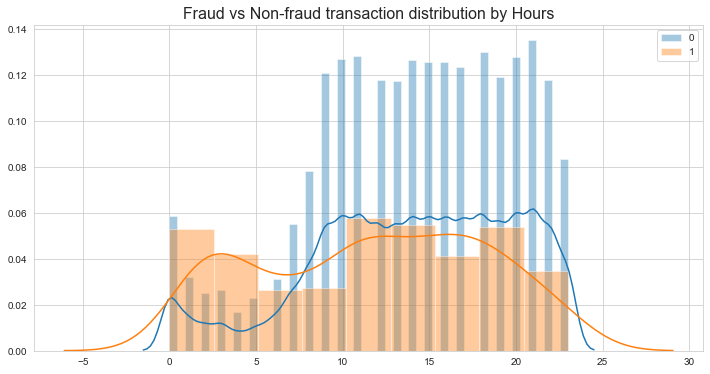

In [28]:
# check for any pattern in the fradulent transactions w.r.t. hour of the day

plt.figure(figsize=(12,6))
plt.title('Fraud vs Non-fraud transaction distribution by Hours', fontsize=16)
sns.distplot(df.loc[df['Class']==0][['Hour']],label='0')
sns.distplot(df.loc[df['Class']==1][['Hour']], label='1')
plt.legend(loc='best')
plt.show()

- #### Most of the fraudent transactions happen at night, i.e., between 12am to 5am
- #### The non-fraudulent transactions happen during the day time, i.e., between 7am to 11pm

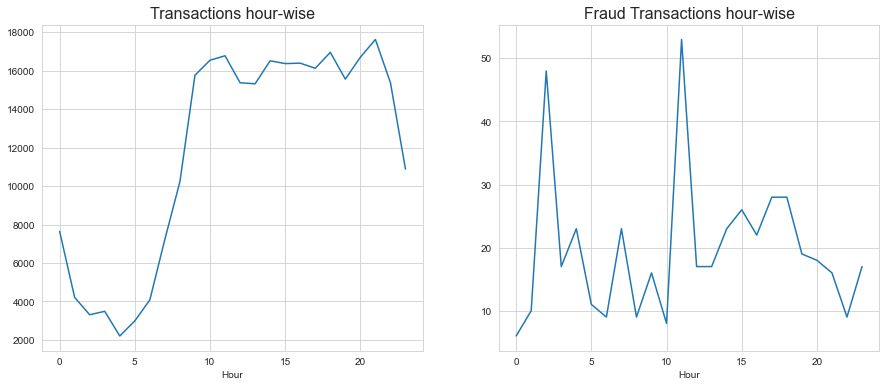

In [29]:
# more drilled view of the above distribution plot (Hour-wise)
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Transactions hour-wise', fontsize=16)
df.groupby('Hour').count()['Class'].plot()

plt.subplot(122)
plt.title('Fraud Transactions hour-wise', fontsize=16)
df.groupby('Hour').sum()['Class'].plot()
plt.show()

In [30]:
# Drop unnecessary columns

# Drop 'time' and 'day' variables, since an important variable named 'Hour' is derived from them
df.drop(['Time', 'Day'], axis=1, inplace=True)

In [32]:
# check shape
df.shape

(283726, 31)

## 3. Data Preparation

### 3.1 Splitting the data into train & test data

In [33]:
y= df['Class'] #class variable
X = df.drop('Class', axis=1) # predictors

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify = y)

# check shapes
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (198608, 30)
X_test: (85118, 30)
y_train: (198608,)
y_test: (85118,)


#### The splitting was done in a stratified fashion to retain the same distribution of classes in train and test as of the original dataset.

In [34]:
# check number of fradulent cases in both train and test set
print('Fraud transactions (Total):', np.sum(y))
print('Fraud transactions (Train):', np.sum(y_train))
print('Fraud transactions (Test) : ', np.sum(y_test))
print()
print('Percentage distribution of fraud transactions (Total):', round(100*(np.sum(y)/df.shape[0]),2))
print('Percentage distribution of fraud transactions (Train):', round(100*(np.sum(y_train)/y_train.shape[0]),2))
print('Percentage distribution of fraud transactions (Test) :', round(100*(np.sum(y_test)/y_test.shape[0]),2))

Fraud transactions (Total): 473
Fraud transactions (Train): 331
Fraud transactions (Test) :  142

Percentage distribution of fraud transactions (Total): 0.17
Percentage distribution of fraud transactions (Train): 0.17
Percentage distribution of fraud transactions (Test) : 0.17


The percentage distribution of the classes is maintained.

### 3.2 Plotting the distribution of a variable

In [35]:
# plot the histogram of 'Amount' from the dataset to see the skewness for both train and test data

def plot_for_skewness(feature):
    plt.figure(figsize=(15,10))

    plt.subplot(221)
    sns.distplot(X_train[feature], color='red')
    plt.title(feature + ' (Train)', fontsize=14)
    
    plt.subplot(222)
    sns.boxplot(y=X_train[feature], color='red')
    plt.title(feature + ' (Train)', fontsize=14)

    plt.subplot(223)
    sns.distplot(X_test[feature], color='green')
    plt.title(feature + ' (Test)', fontsize=14)
    
    plt.subplot(224)
    sns.boxplot(y=X_test[feature], color='green')
    plt.title(feature + ' (Test)', fontsize=14)
    
    plt.show()

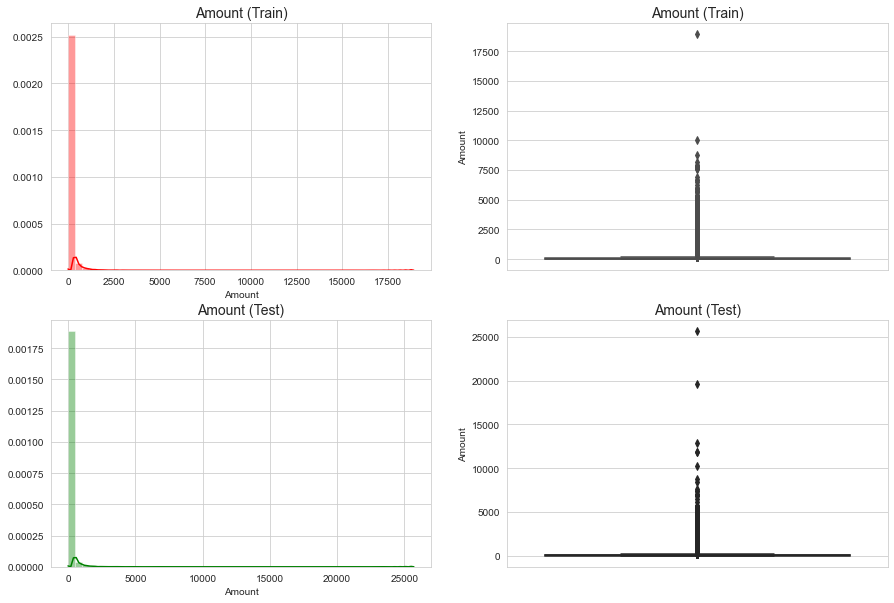

In [36]:
plot_for_skewness('Amount')

#### There is skewness present in the distribution of 'Amount' variable:


In [37]:
# apply power transformation to the distribution more gaussian

pt = PowerTransformer(copy=False) # for inplace transformation
X_train['Amount_pt'] = pt.fit_transform(X_train[['Amount']]) # fit & transform
X_test['Amount_pt'] = pt.transform(X_test[['Amount']]) # transform

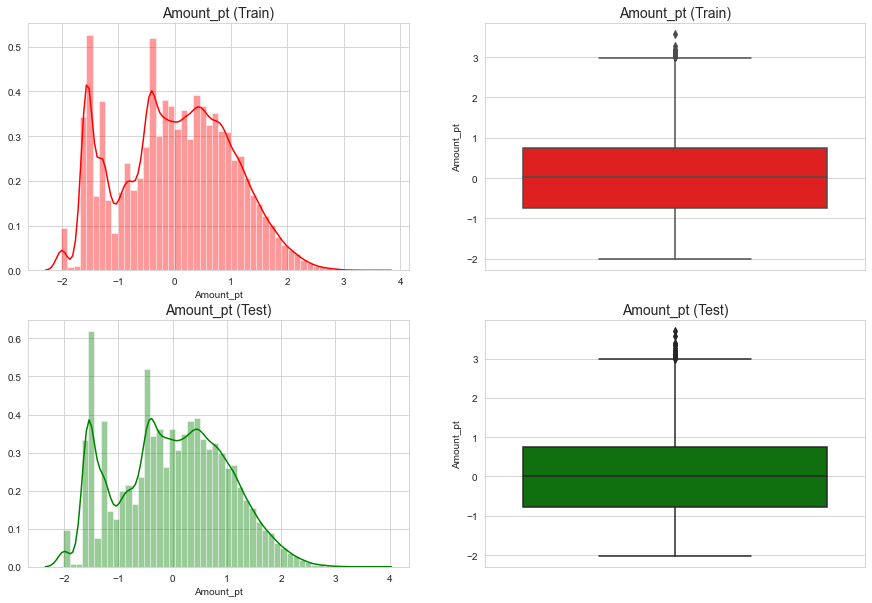

In [38]:
# plot the histogram of Amount feature from the dataset again to see the result 
plot_for_skewness('Amount_pt')

### 3.3 Check for skewness in other variables as well.

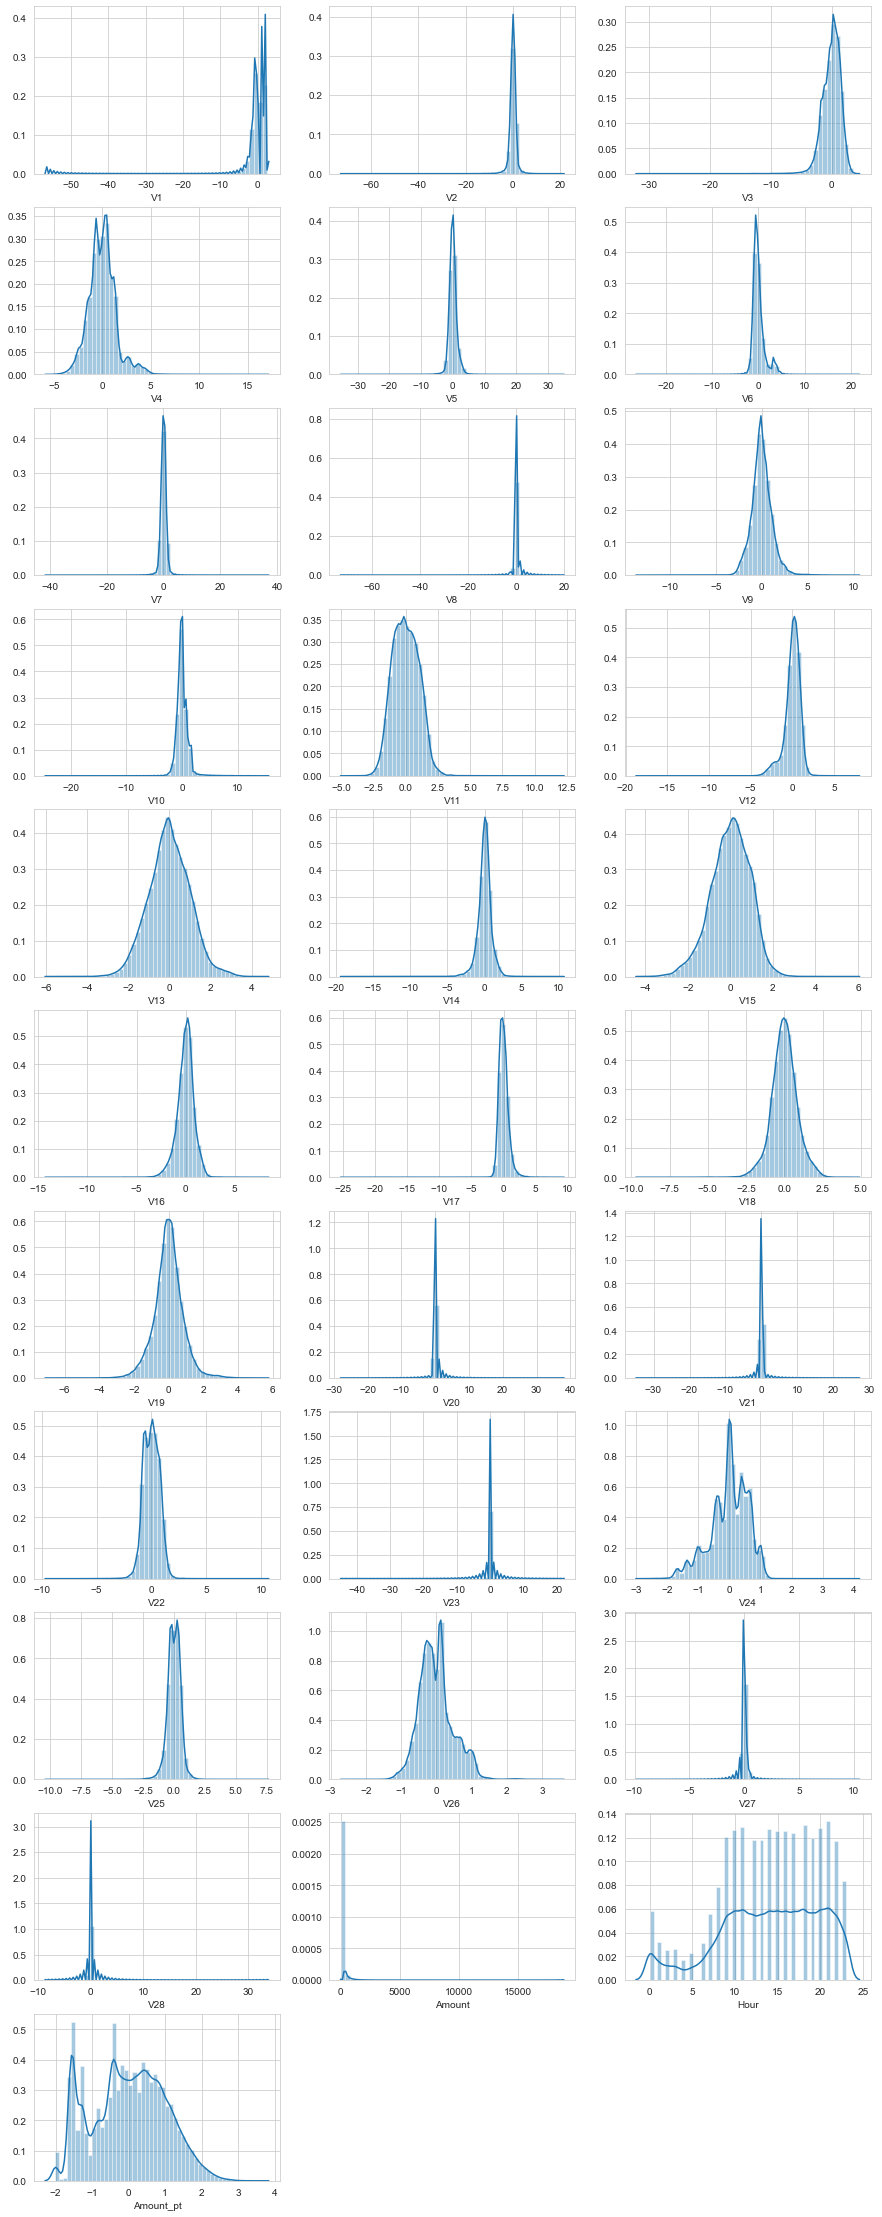

In [39]:
# plot histogram of all the variables from the dataset to see the skewness

plt.figure(figsize=(15,40))

for k,v in enumerate(X_train.columns):
    plt.subplot(11,3,k+1)
    sns.distplot(X_train[v])
    
plt.show()

#### Although the PCA features are already scaled, yet there are few variables that look skewed. It's better to transform the entire data set for uniform scalability.

`Before transforming, let's drop the 'Amount_pt' variable that we just transformed, since the entire data set is anyway going to be transformed again.`

In [40]:
# drop Amount_pt varibale from train and test set
X_train.drop('Amount_pt', axis=1, inplace=True)
X_test.drop('Amount_pt', axis=1, inplace=True)

In [41]:
# transform the entire dataset
X_train_pt = pd.DataFrame(pt.fit_transform(X_train), columns=X_train.columns)
X_test_pt = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

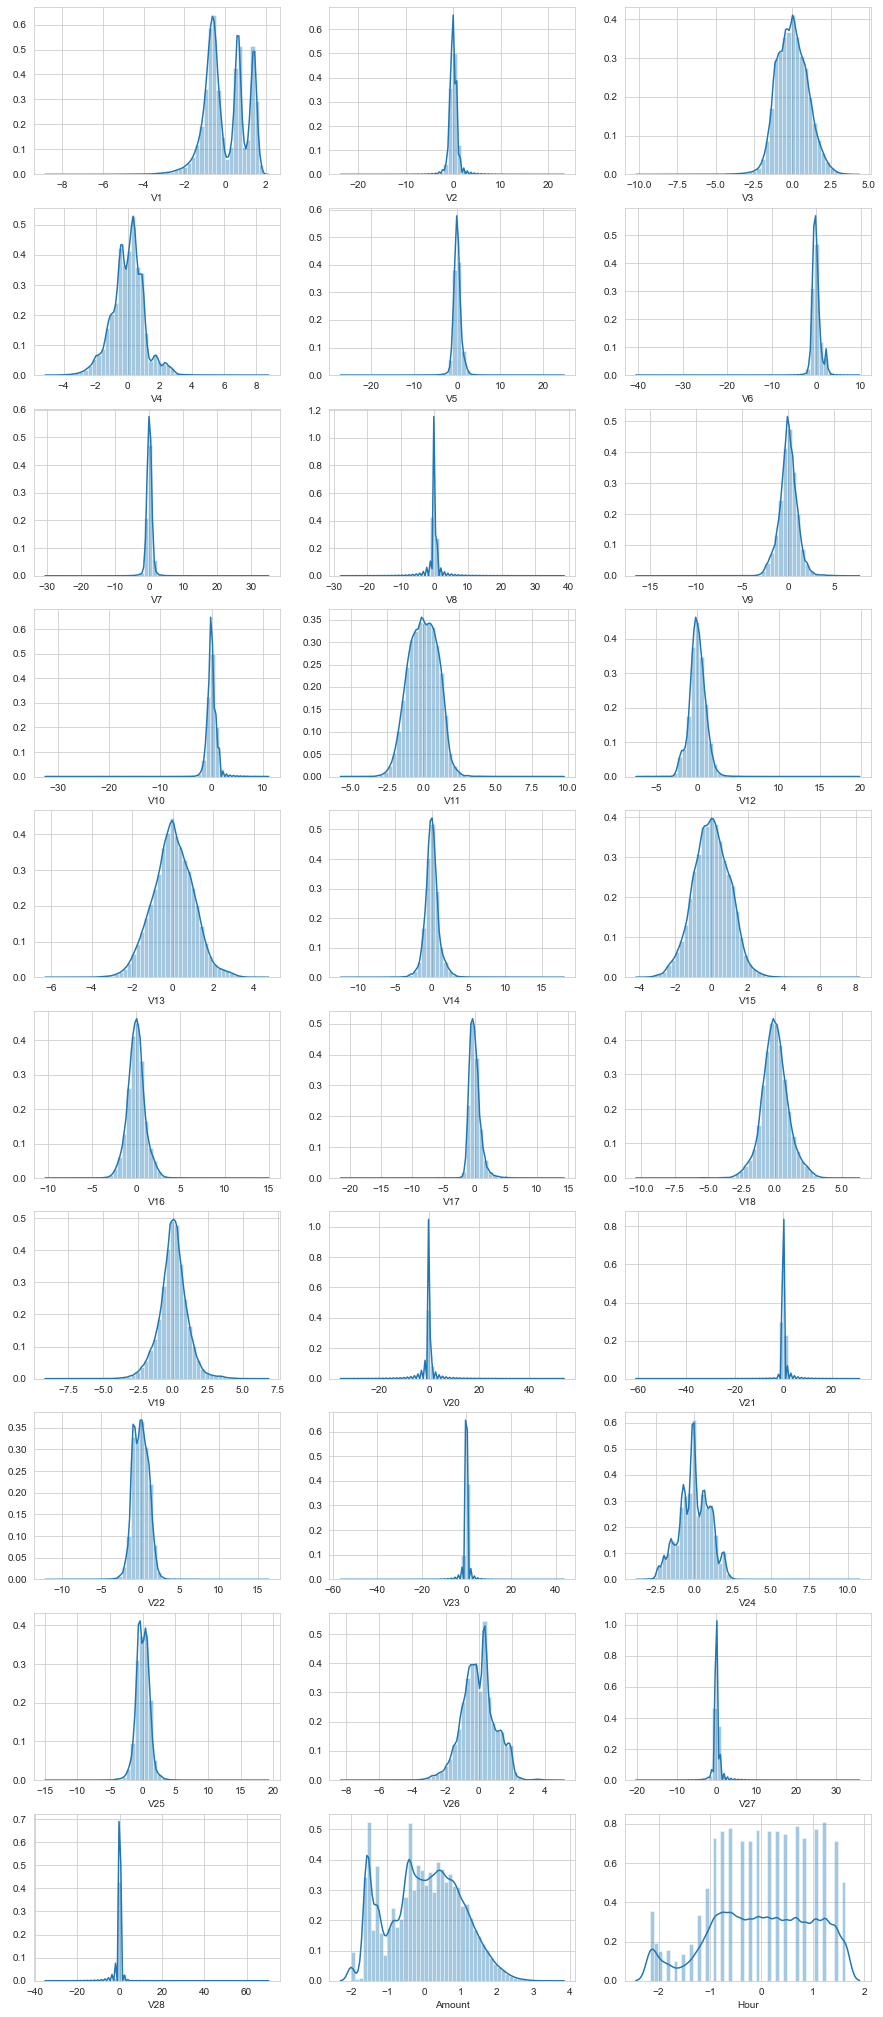

In [42]:
# check the distribution of the predictors after transformation
plt.figure(figsize=(15,40))

for k,v in enumerate(X_train_pt.columns):
    plt.subplot(11,3,k+1)
    sns.distplot(X_train_pt[v])
    
plt.show()

#### Now, all the predictors are uniform with their distributions.

In [43]:
# check statistics of transformed dataset (train)
X_train_pt.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
count,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05
mean,1.375732e-17,-5.577724e-18,4.970759e-17,1.597111e-17,1.187069e-17,-9.651172e-18,1.954104e-17,1.012465e-17,3.519478e-18,-5.331763e-18,7.320525e-17,4.526129e-17,3.204871e-17,7.438083e-18,-1.292637e-17,3.051872e-18,1.336323e-17,8.705341e-18,-4.735363e-17,1.131466e-17,-1.459890e-17,3.819382e-17,-1.103806e-17,-2.375026e-17,-9.160369e-18,1.394710e-18,2.881656e-18,-1.428251e-19,6.050203e-16,9.945554e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-8.568519e+00,-2.358408e+01,-9.921844e+00,-4.925749e+00,-2.691767e+01,-4.038297e+01,-3.050597e+01,-2.784728e+01,-1.632011e+01,-3.241099e+01,-5.439671e+00,-7.281996e+00,-6.030471e+00,-1.223918e+01,-3.912634e+00,-1.004758e+01,-2.133580e+01,-1.014014e+01,-8.926846e+00,-3.536725e+01,-6.075411e+01,-1.194518e+01,-5.645586e+01,-3.529811e+00,-1.466763e+01,-8.088764e+00,-2.013856e+01,-3.520825e+01,-2.012658e+00,-2.168154e+00
25%,-7.241658e-01,-4.581218e-01,-7.145478e-01,-5.689403e-01,-5.072859e-01,-5.552226e-01,-4.699923e-01,-2.780263e-01,-5.615237e-01,-4.767028e-01,-7.345235e-01,-5.872030e-01,-6.464068e-01,-5.197498e-01,-6.716473e-01,-6.024802e-01,-6.034345e-01,-6.089246e-01,-5.559034e-01,-2.856010e-01,-3.070272e-01,-7.576501e-01,-2.732168e-01,-6.601527e-01,-6.363943e-01,-6.506456e-01,-2.074809e-01,-1.545239e-01,-7.413837e-01,-7.483713e-01
50%,-2.496368e-01,-4.307861e-02,-2.253286e-02,6.330691e-02,-3.741356e-02,-1.197452e-01,2.126867e-02,-5.576506e-02,6.928269e-03,-4.363578e-02,1.242472e-02,-1.839916e-02,-2.800701e-03,-2.505081e-02,-3.372284e-03,-5.727329e-03,-1.188384e-01,-2.623186e-02,1.531890e-02,-8.789667e-02,-2.485150e-02,-6.448390e-03,-3.121544e-02,-3.035193e-02,-6.901048e-03,-1.628564e-02,-1.979560e-02,4.930161e-02,2.993923e-02,1.202364e-01
75%,7.352944e-01,4.774251e-01,6.753817e-01,5.834723e-01,4.508209e-01,4.059344e-01,4.679088e-01,2.570628e-01,5.819265e-01,4.635456e-01,7.469055e-01,6.094524e-01,6.700288e-01,4.870409e-01,6.919607e-01,5.681490e-01,4.556183e-01,5.853630e-01,5.698970e-01,1.726311e-01,2.755576e-01,7.229684e-01,2.275740e-01,7.061806e-01,6.589965e-01,5.776983e-01,2.155307e-01,2.589067e-01,7.507486e-01,8.607613e-01
max,1.864107e+00,2.318429e+01,4.121265e+00,8.562277e+00,2.464801e+01,9.606663e+00,3.499477e+01,3.856296e+01,7.536693e+00,1.101142e+01,9.472438e+00,1.963342e+01,4.459459e+00,1.782532e+01,7.937604e+00,1.474234e+01,1.416999e+01,6.066510e+00,6.612255e+00,5.384115e+01,3.136638e+01,1.611916e+01,4.375675e+01,1.050715e+01,1.901906e+01,4.903235e+00,3.589278e+01,7.041095e+01,3.564988e+00,1.634633e+00


## 4. Model Building
- Case 1: Build different models on the **imbalanced dataset** and see the result
- Case 2: Build different models on the **balanced dataset** and see the result

### 4.1 Modelling on imbalanced dataset
1. Logistic Regression
2. KNN
3. Decision Tree
4. Random Forest
5. XGBoost

---
---

#### The dataset is huge and it takes huge amounts of time to cross validate and tune the hyperparameters. Hence, the choice of no. of folds and range of hyperparameters have been chosen accordingly.

---
---

In [44]:
# generic function for hyperparameter tuning

def hyper_tuning(X_train, y_train, parameters, classifier, isStratified, isGridSearch):
    
    if isStratified:
      # create 3 folds
      n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
    else:
      # create 3 folds
      n_folds = KFold(n_splits=3, shuffle=True, random_state=4)
    
    if isGridSearch:
      # instantiate gridsearchCV with required parameters
      model_cv = GridSearchCV(estimator=classifier,    # logistic, decisiontree, random forest, etc
                              param_grid=parameters,   # hyperparameters to tune, such as max_depth, penalty, etc
                              cv=n_folds,              # cross validation
                              scoring='roc_auc',       # scoring to be used for identifying the best hyperparameters
                              return_train_score=True, 
                              verbose=1,
                              n_jobs=-1                # parallel computing
                              )
    else:
      # instantiate RandomizedSearchCV with required parameters
      model_cv = RandomizedSearchCV(estimator=classifier,             # logistic, decisiontree, random forest, etc
                                    param_distributions=parameters,   # hyperparameters to tune, such as max_depth, penalty, etc
                                    cv=n_folds,                       # cross validation
                                    scoring='roc_auc',                # scoring to be used for identifying the best hyperparameters
                                    return_train_score=True, 
                                    verbose=1,
                                    n_jobs=-1                         # parallel computing
                                  )

    
    # fit model on training data
    model_cv.fit(X_train, y_train)
    
    return model_cv

In [45]:
# generic function to print the relevant scores
def print_scores(model_name, y_true, y_pred, y_pred_prob):
    
    print('---' * 20)
    print(model_name + '\n')
    print('Confusion matrix:\n', metrics.confusion_matrix(y_true, y_pred))
    print()
    print('Recall Score: {:.4f}'.format(metrics.recall_score(y_true, y_pred)))
    print('Precision Score: {:.4f}'.format(metrics.precision_score(y_true, y_pred)))
    print('F1 Score: {:.4f}'.format(metrics.f1_score(y_true, y_pred)))
    print('Accuracy Score: {:.4f}'.format(metrics.accuracy_score(y_true, y_pred)))
    print("AUC: {:.4f}".format(metrics.roc_auc_score(y_true, y_pred_prob)))
    print('---' * 20)

    dict_scores = {'AUC':metrics.roc_auc_score(y_true, y_pred_prob),
                  'F1': metrics.f1_score(y_true, y_pred),
                  'Recall': metrics.recall_score(y_true, y_pred),
                  'Accuracy': metrics.roc_auc_score(y_true, y_pred_prob)
                  }

    return dict_scores

In [46]:
# generic function to print best params of model
def get_param_str(model, param_default):

  param_str = param_default
  for k,v in model.best_params_.items():
    param_str += ', '+ k + "=" + str(v)

  return param_str  

### 4.1.1 Logistic Regression (Imbalanced data)

In [47]:
classifier = LogisticRegression(class_weight=None)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10], # Inverse of Regularization, C = 1/lambda
              'penalty': ['l1', 'l2']              # Regularization parameter
             }

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True)

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.7s finished


------------------------------------------------------------
Best AUC:  0.9784354300337244
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}
------------------------------------------------------------


In [48]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_lr = y_test_pred_prob

train_scores = print_scores('Logistic Regression: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Logistic Regression: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Logistic Regression: Train Result

Confusion matrix:
 [[198251     26]
 [   135    196]]

Recall Score: 0.5921
Precision Score: 0.8829
F1 Score: 0.7089
Accuracy Score: 0.9992
AUC: 0.9808
------------------------------------------------------------
------------------------------------------------------------
Logistic Regression: Test Result

Confusion matrix:
 [[84966    10]
 [   66    76]]

Recall Score: 0.5352
Precision Score: 0.8837
F1 Score: 0.6667
Accuracy Score: 0.9991
AUC: 0.9795
------------------------------------------------------------


In [49]:
results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'LR, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),3),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),3),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),3),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),3)})

results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98


---

Though AUC is pretty good, but the recall and F1-score are low. Let's find the optimal cutoff score by plotting the sensitivity, specificity and the accuracy scores for various probabilities. **This behaviour is due to the fact that the predict() method internally takes the cutoff as 0.5 to predict the score, and when data is imbalanced, this cutoff might not help.**

---

`Create generic functions related to finding the optimal cut off point.`

In [50]:
# generic function to create data frame with various probabilities
def get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred):

  # create train data frame to store actual and predicted class labels
  y_train_final = pd.DataFrame({ 'class_true': y_train.values,
                                 'class_prob': y_train_pred_prob,
                                 'class_pred': y_train_pred
                              })
  
  # create train data frame to store actual and predicted class labels
  y_test_final = pd.DataFrame({ 'class_true': y_test.values,
                                'class_prob': y_test_pred_prob,
                                'class_pred': y_test_pred
                              })
  
  # Let's create columns with different probability cutoffs 
  numbers = [float(x)/10 for x in range(10)]
  for i in numbers:
      y_train_final[i]= y_train_final['class_prob'].map(lambda x: 1 if x > i else 0)

  # calculate and plot accuracy, sensitivity, and specificity for various probability cutoffs.
  cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

      # TP = confusion[1,1] # true positive 
      # TN = confusion[0,0] # true negatives
      # FP = confusion[0,1] # false positives
      # FN = confusion[1,0] # false negatives

  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
      cm1 = metrics.confusion_matrix(y_train_final['class_true'], y_train_final[i])
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1

      speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

  #  plot accuracy sensitivity and specificity for various probabilities.
  cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
  plt.show()

  return [y_train_final,y_test_final, cutoff_df]

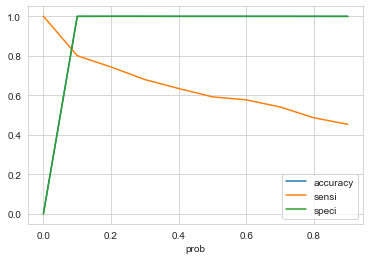

,prob,accuracy,sensi,speci
0.0,0.0,0.001667,1.000000,0.000000
0.1,0.1,0.999315,0.800604,0.999647
0.2,0.2,0.999391,0.743202,0.999818
0.3,0.3,0.999320,0.679758,0.999854
0.4,0.4,0.999250,0.634441,0.999859


In [51]:
# get cutoff df and its plot
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)

y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]

y_final[2].head()

#### From the curve above, **0.1** is the optimum point to take it as a cutoff probability.

In [52]:
# generic function to map final predicted values based on the cutoff

def print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, cutoff):
  
  y_train_pred_final['final_pred']= y_train_pred_final['class_prob'].map(lambda x: 1 if x > cutoff else 0)

  y_test_pred_final['final_pred']= y_test_pred_final['class_prob'].map(lambda x: 1 if x > cutoff else 0)

  print('---' * 30)
  print('--' *21 + 'Train' + '--' * 21)
  print('---' * 30)
  print(y_train_pred_final.head())
  print('---' * 30)
  print('---' * 30)
  print('--' *21 + 'Test' + '--' * 22)
  print('---' * 30)
  print(y_test_pred_final.head())
  print('---' * 30)

In [53]:
# get final predicted values based on the cutoff
print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.1)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0    0.000213           0    1    0    0    0    0    0    0    0   
1           0    0.000243           0    1    0    0    0    0    0    0    0   
2           0    0.000940           0    1    0    0    0    0    0    0    0   
3           0    0.000481           0    1    0    0    0    0    0    0    0   
4           0    0.000661           0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [54]:
train_scores = print_scores('Logistic Regression: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('Logistic Regression: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------
Logistic Regression: Train Result

Confusion matrix:
 [[198207     70]
 [    66    265]]

Recall Score: 0.8006
Precision Score: 0.7910
F1 Score: 0.7958
Accuracy Score: 0.9993
AUC: 0.9808
------------------------------------------------------------
------------------------------------------------------------
Logistic Regression: Test Result

Confusion matrix:
 [[84946    30]
 [   34   108]]

Recall Score: 0.7606
Precision Score: 0.7826
F1 Score: 0.7714
Accuracy Score: 0.9992
AUC: 0.9795
------------------------------------------------------------


In [55]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'LR, Imbalanced, cutoff=0.1')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98


In [56]:
# generic function to draw roc curve
def draw_roc(model_type, actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label= model_type + ' (auc = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating characteristic', fontsize=16)
    plt.legend(loc="lower right") 
    plt.show()

    return None

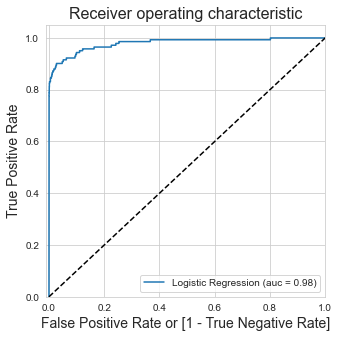

In [57]:
draw_roc('Logistic Regression', y_test_pred_final['class_true'], y_test_pred_final['class_prob'])

### 4.1.2 K Nearest Neighbour (Imbalanced data)

In [58]:
classifier = KNeighborsClassifier()
parameters = {'n_neighbors': [3] # Range for no. of neighbors
             }

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, False)  # KFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 36.2min finished


------------------------------------------------------------
Best AUC:  0.9199981120473678
Best hyperparameters:  {'n_neighbors': 3}
------------------------------------------------------------


In [59]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

#save the probs in a variable
y_test_pred_prob_knn = y_test_pred_prob

train_scores = print_scores('K Nearest Neighbor: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('K Nearest Neighbor: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
K Nearest Neighbor: Train Result

Confusion matrix:
 [[198268      9]
 [    58    273]]

Recall Score: 0.8248
Precision Score: 0.9681
F1 Score: 0.8907
Accuracy Score: 0.9997
AUC: 1.0000
------------------------------------------------------------
------------------------------------------------------------
K Nearest Neighbor: Test Result

Confusion matrix:
 [[84959    17]
 [   35   107]]

Recall Score: 0.7535
Precision Score: 0.8629
F1 Score: 0.8045
Accuracy Score: 0.9994
AUC: 0.8978
------------------------------------------------------------


The above results are based on the internal cutoff of 0.5. Let's check the accuracy, sesisitivity and specificity plot for the optimal cutoff.

In [60]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'KNN, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90


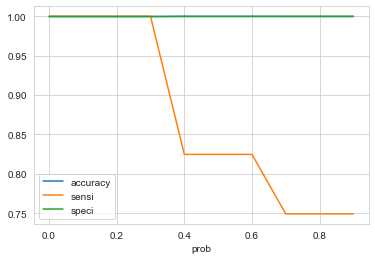

,prob,accuracy,sensi,speci
0.0,0.0,0.999632,1.000000,0.999632
0.1,0.1,0.999632,1.000000,0.999632
0.2,0.2,0.999632,1.000000,0.999632
0.3,0.3,0.999632,1.000000,0.999632
0.4,0.4,0.999663,0.824773,0.999955


In [61]:
# get cutoff df and its plot
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)

y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]

y_final[2].head()

#### From the curve above, **0.3** is the optimum point to take it as a cutoff probability.

In [62]:
# get final predicted values based on the cutoff
print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.3)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0         0.0           0    0    0    0    0    0    0    0    0   
1           0         0.0           0    0    0    0    0    0    0    0    0   
2           0         0.0           0    0    0    0    0    0    0    0    0   
3           0         0.0           0    0    0    0    0    0    0    0    0   
4           0         0.0           0    0    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [63]:
train_scores = print_scores('K Nearest Neighbor: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('K Nearest Neighbor: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------
K Nearest Neighbor: Train Result

Confusion matrix:
 [[198204     73]
 [     0    331]]

Recall Score: 1.0000
Precision Score: 0.8193
F1 Score: 0.9007
Accuracy Score: 0.9996
AUC: 1.0000
------------------------------------------------------------
------------------------------------------------------------
K Nearest Neighbor: Test Result

Confusion matrix:
 [[84925    51]
 [   29   113]]

Recall Score: 0.7958
Precision Score: 0.6890
F1 Score: 0.7386
Accuracy Score: 0.9991
AUC: 0.8978
------------------------------------------------------------


In [64]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'KNN, Imbalanced, cutoff=0.3')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90


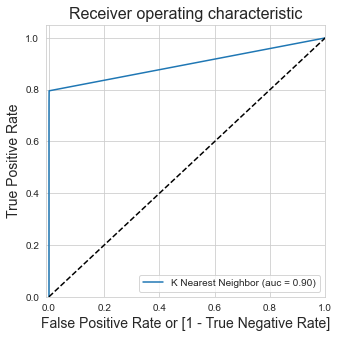

In [65]:
draw_roc('K Nearest Neighbor', y_test, y_test_pred_prob)

### 4.1.3 Decision Tree (Imbalanced data)

Find the optimal ranges of below hyperparamters individually and then find the best hyperparameters to build the model:
- max_depth
- min_samples_leaf
- min_samples_split

In [66]:
# generic function to plot train and test scores with hyperparameters
def plot_scores(scores, param_name):
    param = 'param_' + param_name
    plt.figure(figsize=(12,6))
    plt.plot(scores[param], 
             scores["mean_train_score"], 
             label="Training score-auc")
    plt.plot(scores[param], 
             scores["mean_test_score"], 
             label="Test score - auc")
    plt.xlabel(param_name)
    plt.ylabel("roc-auc")
    plt.legend(loc='best')
    plt.title('Test-Train score w.r.t ' + param_name, fontsize='x-large')
    plt.show()

### 4.1.3.1 'max_depth' hyperparameter tuning

In [67]:
classifier = DecisionTreeClassifier(class_weight=None, random_state=100)
parameters = {'max_depth': list(range(2, 10, 1)), # max depth of the tree
             'criterion': ['gini']}               # homogeneity measure

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True) # KFold & grid search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   58.8s finished


------------------------------------------------------------
Best AUC:  0.9015550823238724
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 4}
------------------------------------------------------------


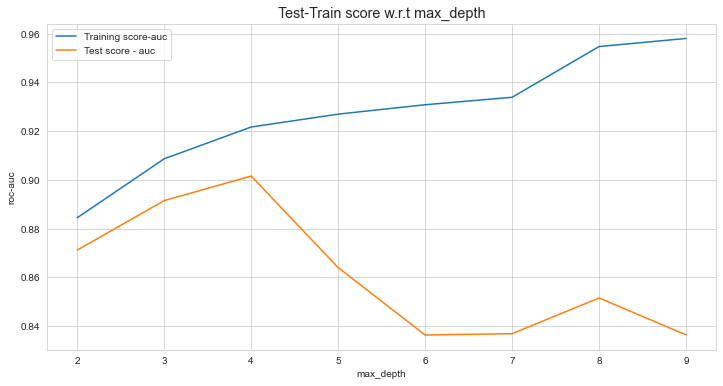

In [68]:
# plotting scores with 'max_depth' hyperparameter
scores = model_cv.cv_results_

plot_scores(scores, 'max_depth')

As the max_depth increases, the training and the test scores start to separate; overfitting happens.

### 4.1.3.2 'min_samples_leaf' hyperparameter tuning

In [69]:
classifier = DecisionTreeClassifier(class_weight=None, random_state=100)
parameters = {'min_samples_leaf': list(range(5, 10, 1)), # min samples in leaf to split the node of the tree
             'criterion': ['gini']}                      # homogeneity measure

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True) # KFold & grid search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


------------------------------------------------------------
Best AUC:  0.912558797989445
Best hyperparameters:  {'criterion': 'gini', 'min_samples_leaf': 8}
------------------------------------------------------------


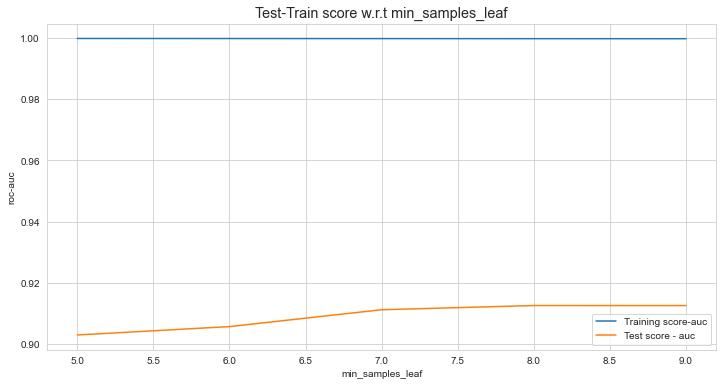

In [70]:
# plotting scores with 'min_samples_leaf' hyperparameter
scores = model_cv.cv_results_

plot_scores(scores, 'min_samples_leaf')

As the no. of min samples in a leaf increases, the score becomes better.

### 4.1.3.3 'min_samples_split' hyperparameter tuning

In [71]:
classifier = DecisionTreeClassifier(class_weight=None, random_state=100)
parameters = {'min_samples_split': list(range(5, 10, 1)), # min samples in a node to split the node of the tree
             'criterion': ['gini']}                         # homogeneity measure

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True) # KFold & grid search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished


------------------------------------------------------------
Best AUC:  0.8904568386134065
Best hyperparameters:  {'criterion': 'gini', 'min_samples_split': 9}
------------------------------------------------------------


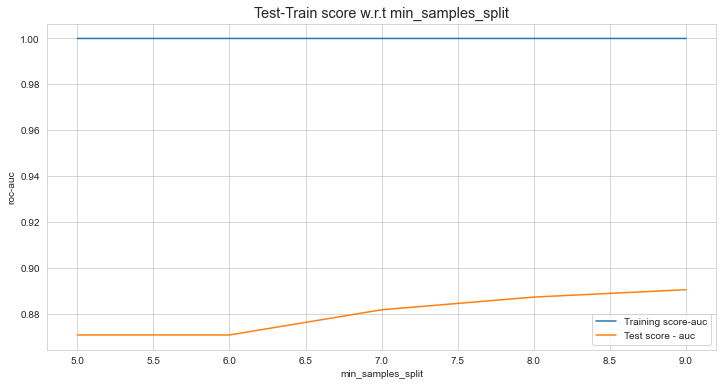

In [72]:
# plotting scores with 'min_samples_split' hyperparameter
scores = model_cv.cv_results_

plot_scores(scores, 'min_samples_split')

As the no. of min samples splits increases, the tree becomes less complex.

### 4.1.3.4 Build Decision tree with optimal ranges of hyperparameters

In [73]:
classifier = DecisionTreeClassifier(class_weight=None, random_state=100)
parameters = {
    'max_depth': list(range(2, 4, 1)),          # max depth of the tree
    'min_samples_leaf': list(range(7, 10, 1)),   # min samples in leaf to split the node of the tree
    'min_samples_split': list(range(7, 10, 1)), # min samples in a node to split the node of the tree
    'criterion': ['entropy','gini']}            # homogeneity measure

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True) # KFold & grid search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.4min finished


------------------------------------------------------------
Best AUC:  0.9289918772621432
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 7}
------------------------------------------------------------


In [74]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_dt = y_test_pred_prob

train_scores = print_scores('Decision Tree: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[198235     42]
 [    64    267]]

Recall Score: 0.8066
Precision Score: 0.8641
F1 Score: 0.8344
Accuracy Score: 0.9995
AUC: 0.9528
------------------------------------------------------------
------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[84952    24]
 [   34   108]]

Recall Score: 0.7606
Precision Score: 0.8182
F1 Score: 0.7883
Accuracy Score: 0.9993
AUC: 0.9463
------------------------------------------------------------


The above results are based on the internal cutoff of 0.5. Let's check the accuracy, sesisitivity and specificity plot for the optimal cutoff.

In [75]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95


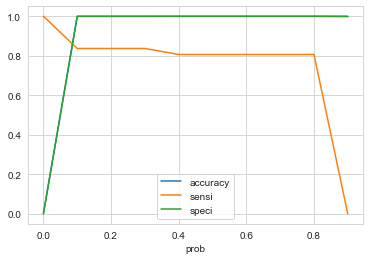

,prob,accuracy,sensi,speci
0.0,0.0,0.001798,1.000000,0.000131
0.1,0.1,0.999421,0.836858,0.999692
0.2,0.2,0.999421,0.836858,0.999692
0.3,0.3,0.999421,0.836858,0.999692
0.4,0.4,0.999466,0.806647,0.999788


In [76]:
# get cutoff df and its plot
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)

y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]

y_final[2].head()

#### From the curve above, **0.1** is the optimum point to take it as a cutoff probability.

In [77]:
# get final predicted values based on the cutoff
print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.1)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0    0.000148           0    1    0    0    0    0    0    0    0   
1           0    0.000148           0    1    0    0    0    0    0    0    0   
2           0    0.000148           0    1    0    0    0    0    0    0    0   
3           0    0.000148           0    1    0    0    0    0    0    0    0   
4           0    0.001507           0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [78]:
train_scores = print_scores('Decision Tree: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[198216     61]
 [    54    277]]

Recall Score: 0.8369
Precision Score: 0.8195
F1 Score: 0.8281
Accuracy Score: 0.9994
AUC: 0.9528
------------------------------------------------------------
------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[84939    37]
 [   28   114]]

Recall Score: 0.8028
Precision Score: 0.7550
F1 Score: 0.7782
Accuracy Score: 0.9992
AUC: 0.9463
------------------------------------------------------------


In [79]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT, Imbalanced, cutoff=0.1')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95


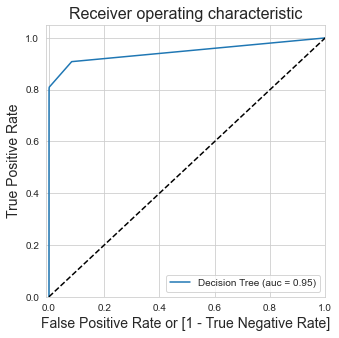

In [80]:
draw_roc('Decision Tree', y_test, y_test_pred_prob)

### 4.1.4 Random Forest (Imbalanced data)

Since, the decision tree did not overfit, let's consider the same tuned hyperparameters from decision tree and tune only the below two hyperparameters:

- n_estimators
- max_features

Also, because the computational time is growing heavily. 

In [81]:
classifier = RandomForestClassifier(class_weight=None, random_state=100)

parameters = {
    'max_depth': [3],              # max depth of the tree
    'min_samples_leaf': [7],       # min samples in leaf to split the node of the tree
    'min_samples_split': [7],      # min samples in a node to split the node of the tree
    'criterion': ['entropy'],      # homogeneity measure
    'n_estimators': [200, 300],    # No. of trees
    'max_features': [15,20]        # Max no. of features to consider for a split
    }                   

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, False) # KFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 35.3min finished


------------------------------------------------------------
Best AUC:  0.9739810423874463
Best hyperparameters:  {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 20, 'max_depth': 3, 'criterion': 'entropy'}
------------------------------------------------------------


In [82]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_rf = y_test_pred_prob

train_scores = print_scores('Random Forest: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Random Forest: Train Result

Confusion matrix:
 [[198236     41]
 [    59    272]]

Recall Score: 0.8218
Precision Score: 0.8690
F1 Score: 0.8447
Accuracy Score: 0.9995
AUC: 0.9838
------------------------------------------------------------
------------------------------------------------------------
Random Forest: Test Result

Confusion matrix:
 [[84951    25]
 [   34   108]]

Recall Score: 0.7606
Precision Score: 0.8120
F1 Score: 0.7855
Accuracy Score: 0.9993
AUC: 0.9783
------------------------------------------------------------


The above results are based on the internal cutoff of 0.5. Let's check the accuracy, sesisitivity and specificity plot for the optimal cutoff.

In [83]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98


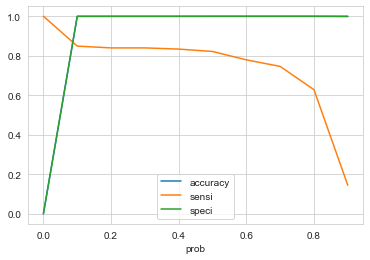

,prob,accuracy,sensi,speci
0.0,0.0,0.001667,1.000000,0.000000
0.1,0.1,0.999366,0.848943,0.999617
0.2,0.2,0.999416,0.839879,0.999682
0.3,0.3,0.999426,0.839879,0.999692
0.4,0.4,0.999441,0.833837,0.999718


In [84]:
# get cutoff df and its plot
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)

y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]

y_final[2].head()

In [85]:
# get final predicted values based on the cutoff
print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.1)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0    0.000167           0    1    0    0    0    0    0    0    0   
1           0    0.000337           0    1    0    0    0    0    0    0    0   
2           0    0.000324           0    1    0    0    0    0    0    0    0   
3           0    0.000302           0    1    0    0    0    0    0    0    0   
4           0    0.000721           0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [86]:
train_scores = print_scores('Random Forest: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------
Random Forest: Train Result

Confusion matrix:
 [[198201     76]
 [    50    281]]

Recall Score: 0.8489
Precision Score: 0.7871
F1 Score: 0.8169
Accuracy Score: 0.9994
AUC: 0.9838
------------------------------------------------------------
------------------------------------------------------------
Random Forest: Test Result

Confusion matrix:
 [[84927    49]
 [   28   114]]

Recall Score: 0.8028
Precision Score: 0.6994
F1 Score: 0.7475
Accuracy Score: 0.9991
AUC: 0.9783
------------------------------------------------------------


In [87]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF, Imbalanced, cutoff=0.1')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98


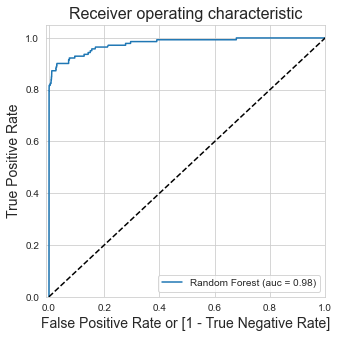

In [88]:
draw_roc('Random Forest', y_test, y_test_pred_prob)

### 4.1.5 XGBoost (Imbalanced data)

In [89]:
classifier = XGBClassifier(class_weight=None, random_state=100)

parameters = {
    'max_depth': [3,4,5],              # max depth of the tree
    'learning_rate': [0.03,0.05,0.07]  # Regularization parameter
    }                   

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, False) # KFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 17.0min finished


------------------------------------------------------------
Best AUC:  0.9669120136225322
Best hyperparameters:  {'max_depth': 3, 'learning_rate': 0.07}
------------------------------------------------------------


In [90]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_xgb = y_test_pred_prob

train_scores = print_scores('XGBoost: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('XGBoost: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
XGBoost: Train Result

Confusion matrix:
 [[198270      7]
 [    54    277]]

Recall Score: 0.8369
Precision Score: 0.9754
F1 Score: 0.9008
Accuracy Score: 0.9997
AUC: 0.9919
------------------------------------------------------------
------------------------------------------------------------
XGBoost: Test Result

Confusion matrix:
 [[84958    18]
 [   34   108]]

Recall Score: 0.7606
Precision Score: 0.8571
F1 Score: 0.8060
Accuracy Score: 0.9994
AUC: 0.9775
------------------------------------------------------------


The above results are based on the internal cutoff of 0.5. Let's check the accuracy, sesisitivity and specificity plot for the optimal cutoff.

In [91]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98


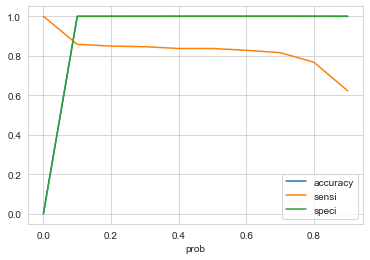

,prob,accuracy,sensi,speci
0.0,0.0,0.001667,1.000000,0.000000
0.1,0.1,0.999436,0.858006,0.999672
0.2,0.2,0.999502,0.848943,0.999753
0.3,0.3,0.999542,0.845921,0.999798
0.4,0.4,0.999658,0.836858,0.999929


In [92]:
# get cutoff df and its plot
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)

y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]

y_final[2].head()

In [93]:
# get final predicted values based on the cutoff
print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.1)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0    0.000534           0    1    0    0    0    0    0    0    0   
1           0    0.000534           0    1    0    0    0    0    0    0    0   
2           0    0.001832           0    1    0    0    0    0    0    0    0   
3           0    0.000868           0    1    0    0    0    0    0    0    0   
4           0    0.000840           0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [94]:
train_scores = print_scores('XG Boost: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('XG Boost: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------
XG Boost: Train Result

Confusion matrix:
 [[198212     65]
 [    47    284]]

Recall Score: 0.8580
Precision Score: 0.8138
F1 Score: 0.8353
Accuracy Score: 0.9994
AUC: 0.9919
------------------------------------------------------------
------------------------------------------------------------
XG Boost: Test Result

Confusion matrix:
 [[84939    37]
 [   27   115]]

Recall Score: 0.8099
Precision Score: 0.7566
F1 Score: 0.7823
Accuracy Score: 0.9992
AUC: 0.9775
------------------------------------------------------------


In [95]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB, Imbalanced, cutoff=0.1')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


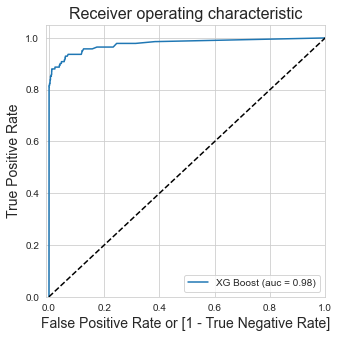

In [96]:
draw_roc('XG Boost', y_test, y_test_pred_prob)

### Check top 3 models on imbalanced data set


In [97]:
# results.reset_index(drop=True, inplace=True)
results.sort_values(by='Recall (Test)', ascending=False)[:3]

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.78,0.86,0.81,0.99,0.98
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.74,1.00,0.80,1.00,0.90
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.78,0.84,0.80,0.95,0.95


In [98]:
# generic function to dra roc curve for top N models
def draw_roc_top_n(model_results, actual):

    plt.figure(figsize=(5, 5))
    for model_type,probs in models_results.items():
      fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )

      auc_score = metrics.roc_auc_score( actual, probs )
    
      plt.plot( fpr, tpr, label= model_type + ' (auc = %0.2f)' % auc_score )

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating characteristic', fontsize=16)
    plt.legend(loc="lower right") 
    plt.show()

    return None

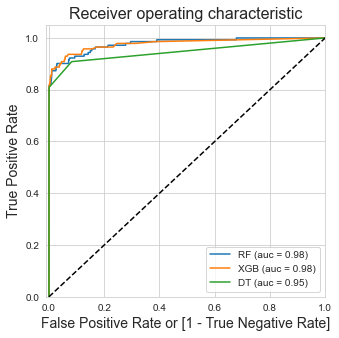

In [99]:
models_results = {
    'RF': y_test_pred_prob_rf,
    'XGB': y_test_pred_prob_xgb,
    'DT': y_test_pred_prob_dt
}
draw_roc_top_n(models_results, y_test)

### 4.2 Modelling on balanced dataset
1. Decision Tree
2. Random Forest
3. XGBoost

Methods for balancing:
1. Random Oversampling
2. SMOTE
3. ADASYN

### 4.2.1 Random Oversampling

In [100]:
# create random samples for the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pt, y_train)
X_train_ros = pd.DataFrame(X_train_ros, columns=X_train_pt.columns)

#### Now there are equal number of class distribution

### 4.2.1.1 Decision Tree (Balanced Data) with Random Over Sampling

In [102]:
classifier = DecisionTreeClassifier(random_state=100)
parameters = {
    'max_depth': list(range(8, 15, 1)),          # max depth of the tree
    'min_samples_leaf': list(range(8, 12, 1)),   # min samples in leaf to split the node of the tree
    'min_samples_split': list(range(7, 9, 1)),  # min samples in a node to split the node of the tree
    'criterion': ['entropy','gini']}            # homogeneity measure         

model_cv = hyper_tuning(X_train_ros, y_train_ros, parameters, classifier, True, True) # StratifiedKFold & grid search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed: 21.8min finished


------------------------------------------------------------
Best AUC:  0.9998173357557706
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 11, 'min_samples_split': 7}
------------------------------------------------------------


In [103]:
y_train_pred = model_cv.predict(X_train_ros)
y_train_pred_prob = model_cv.predict_proba(X_train_ros)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_dt_ros = y_test_pred_prob

train_scores = print_scores('Decision Tree: Train Result', y_train_ros, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[198124    153]
 [     0 198277]]

Recall Score: 1.0000
Precision Score: 0.9992
F1 Score: 0.9996
Accuracy Score: 0.9996
AUC: 1.0000
------------------------------------------------------------
------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[84857   119]
 [   32   110]]

Recall Score: 0.7746
Precision Score: 0.4803
F1 Score: 0.5930
Accuracy Score: 0.9982
AUC: 0.8870
------------------------------------------------------------


In [104]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT_ROS, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


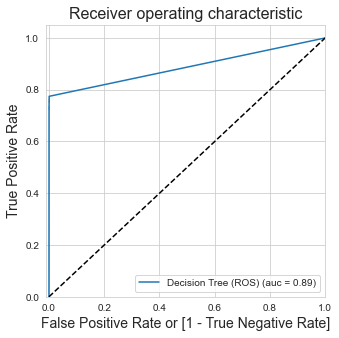

In [105]:
draw_roc('Decision Tree (ROS)', y_test, y_test_pred_prob)

### 4.2.1.2 Random Forest (Balanced Data) with Random Over Sampling

In [106]:
classifier = RandomForestClassifier(random_state=100)
parameters = {
    'max_depth': [3],              # max depth of the tree
    'min_samples_leaf': [7],       # min samples in leaf to split the node of the tree
    'min_samples_split': [7],      # min samples in a node to split the node of the tree
    'criterion': ['entropy'],      # homogeneity measure
    'n_estimators': [200, 300],    # No. of trees
    'max_features': [15,20]        # Max no. of features to consider for a split
    }                

model_cv = hyper_tuning(X_train_ros, y_train_ros, parameters, classifier, True, False) # StratifiedKFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 44.5min finished


------------------------------------------------------------
Best AUC:  0.9877790764999878
Best hyperparameters:  {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 15, 'max_depth': 3, 'criterion': 'entropy'}
------------------------------------------------------------


In [107]:
y_train_pred = model_cv.predict(X_train_ros)
y_train_pred_prob = model_cv.predict_proba(X_train_ros)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_rf_ros = y_test_pred_prob

train_scores = print_scores('Random Forest: Train Result', y_train_ros, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Random Forest: Train Result

Confusion matrix:
 [[197459    818]
 [ 20752 177525]]

Recall Score: 0.8953
Precision Score: 0.9954
F1 Score: 0.9427
Accuracy Score: 0.9456
AUC: 0.9878
------------------------------------------------------------
------------------------------------------------------------
Random Forest: Test Result

Confusion matrix:
 [[84586   390]
 [   24   118]]

Recall Score: 0.8310
Precision Score: 0.2323
F1 Score: 0.3631
Accuracy Score: 0.9951
AUC: 0.9744
------------------------------------------------------------


In [108]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF_ROS, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


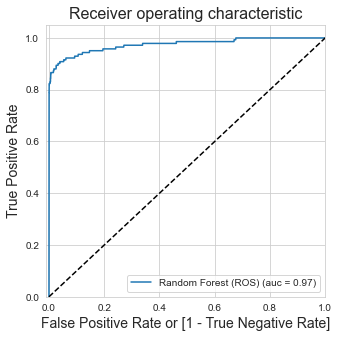

In [109]:
draw_roc('Random Forest (ROS)', y_test, y_test_pred_prob)

### 4.2.1.3 XG Boost (Balanced Data) with Random Over Sampling

In [110]:
classifier = XGBClassifier(random_state=100)

parameters = {
    'max_depth': list(range(4,9)),                           # max depth of the tree
    'learning_rate': [0.05, 0.08, 0.1, 0.5, 0.6]  # Regularization parameter
    }                   

model_cv = hyper_tuning(X_train_ros, y_train_ros, parameters, classifier, True, False) # StratifiedKFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 40.8min finished


------------------------------------------------------------
Best AUC:  0.999995905591847
Best hyperparameters:  {'max_depth': 4, 'learning_rate': 0.6}
------------------------------------------------------------


In [111]:
y_train_pred = model_cv.predict(X_train_ros)
y_train_pred_prob = model_cv.predict_proba(X_train_ros)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_xgb_ros = y_test_pred_prob

train_scores = print_scores('XGBoost: Train Result', y_train_ros, y_train_pred, y_train_pred_prob)
test_scores = print_scores('XGBoost: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
XGBoost: Train Result

Confusion matrix:
 [[198277      0]
 [     0 198277]]

Recall Score: 1.0000
Precision Score: 1.0000
F1 Score: 1.0000
Accuracy Score: 1.0000
AUC: 1.0000
------------------------------------------------------------
------------------------------------------------------------
XGBoost: Test Result

Confusion matrix:
 [[84958    18]
 [   28   114]]

Recall Score: 0.8028
Precision Score: 0.8636
F1 Score: 0.8321
Accuracy Score: 0.9995
AUC: 0.9695
------------------------------------------------------------


In [112]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB_ROS, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


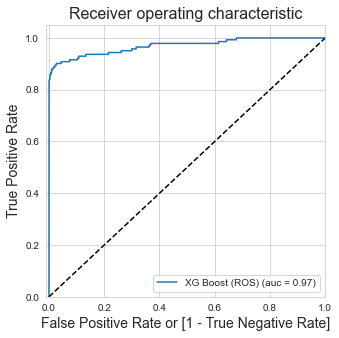

In [113]:
draw_roc('XG Boost (ROS)', y_test, y_test_pred_prob)

### 4.2.2 SMOTE (Synthetic Minority Oversampling Technique)

#### Print the class distribution after applying SMOTE 

In [149]:
# perform SMOTE Oversampling on train set
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, y_train)

In [115]:
# convert train data to data frame from numpy array
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_pt.columns)

### 4.2.2.1 Decision Tree (Balanced Data) with SMOTE

In [116]:
classifier = DecisionTreeClassifier(random_state=100)
parameters = {
    'max_depth': list(range(2, 4, 1)),          # max depth of the tree
    'min_samples_leaf': list(range(7, 9, 1)),   # min samples in leaf to split the node of the tree
    'min_samples_split': list(range(7, 9, 1)),  # min samples in a node to split the node of the tree
    'criterion': ['entropy','gini']}            # homogeneity measure

model_cv = hyper_tuning(X_train_smote, y_train_smote, parameters, classifier, True, True) # StratifiedKFold & grid search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.2min finished


------------------------------------------------------------
Best AUC:  0.9746911961686275
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 7}
------------------------------------------------------------


In [117]:
y_train_pred = model_cv.predict(X_train_smote)
y_train_pred_prob = model_cv.predict_proba(X_train_smote)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_dt_smote = y_test_pred_prob

train_scores = print_scores('Decision Tree: Train Result', y_train_smote, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[182919  15358]
 [ 12902 185375]]

Recall Score: 0.9349
Precision Score: 0.9235
F1 Score: 0.9292
Accuracy Score: 0.9287
AUC: 0.9749
------------------------------------------------------------
------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[78352  6624]
 [   15   127]]

Recall Score: 0.8944
Precision Score: 0.0188
F1 Score: 0.0368
Accuracy Score: 0.9220
AUC: 0.9572
------------------------------------------------------------


In [118]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT_SMOTE, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


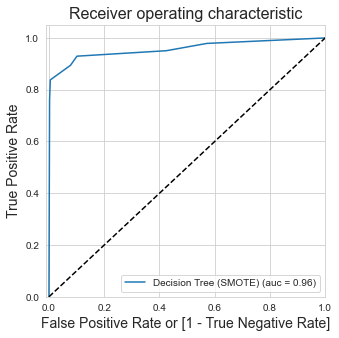

In [119]:
draw_roc('Decision Tree (SMOTE)', y_test, y_test_pred_prob)

### 4.2.2.2 Random Forest (Balanced Data) with SMOTE

In [120]:
classifier = RandomForestClassifier(random_state=100)
parameters = {
    'max_depth': [3],              # max depth of the tree
    'min_samples_leaf': [7],       # min samples in leaf to split the node of the tree
    'min_samples_split': [7],      # min samples in a node to split the node of the tree
    'criterion': ['entropy'],      # homogeneity measure
    'n_estimators': [200, 300],    # No. of trees
    'max_features': [15,20]        # Max no. of features to consider for a split
    }                   

model_cv = hyper_tuning(X_train_smote, y_train_smote, parameters, classifier, True, False) # StratifiedKFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 73.0min finished


------------------------------------------------------------
Best AUC:  0.9852441236908792
Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 15, 'max_depth': 3, 'criterion': 'entropy'}
------------------------------------------------------------


In [121]:
y_train_pred = model_cv.predict(X_train_smote)
y_train_pred_prob = model_cv.predict_proba(X_train_smote)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_rf_smote = y_test_pred_prob

train_scores = print_scores('Random Forest: Train Result', y_train_smote, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Random Forest: Train Result

Confusion matrix:
 [[197388    889]
 [ 24205 174072]]

Recall Score: 0.8779
Precision Score: 0.9949
F1 Score: 0.9328
Accuracy Score: 0.9367
AUC: 0.9853
------------------------------------------------------------
------------------------------------------------------------
Random Forest: Test Result

Confusion matrix:
 [[84557   419]
 [   22   120]]

Recall Score: 0.8451
Precision Score: 0.2226
F1 Score: 0.3524
Accuracy Score: 0.9948
AUC: 0.9762
------------------------------------------------------------


In [122]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF_SMOTE, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


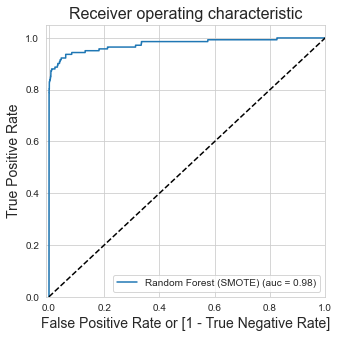

In [123]:
draw_roc('Random Forest (SMOTE)', y_test, y_test_pred_prob)

### 4.2.2.3 XG Boost (Balanced Data) with SMOTE

In [124]:
classifier = XGBClassifier(random_state=100)

parameters = {
    'max_depth': [4,5,8,9],              # max depth of the tree
    'learning_rate': [0.05, 0.08, 0.1, 0.5]  # Regularization parameter
    }    

model_cv = hyper_tuning(X_train_smote, y_train_smote, parameters, classifier, True, False) # StratifiedKFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 71.6min finished


------------------------------------------------------------
Best AUC:  0.9999963129213189
Best hyperparameters:  {'max_depth': 5, 'learning_rate': 0.5}
------------------------------------------------------------


In [125]:
y_train_pred = model_cv.predict(X_train_smote)
y_train_pred_prob = model_cv.predict_proba(X_train_smote)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_xgb_smote = y_test_pred_prob

train_scores = print_scores('XGBoost: Train Result', y_train_smote, y_train_pred, y_train_pred_prob)
test_scores = print_scores('XGBoost: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
XGBoost: Train Result

Confusion matrix:
 [[198277      0]
 [     0 198277]]

Recall Score: 1.0000
Precision Score: 1.0000
F1 Score: 1.0000
Accuracy Score: 1.0000
AUC: 1.0000
------------------------------------------------------------
------------------------------------------------------------
XGBoost: Test Result

Confusion matrix:
 [[84955    21]
 [   27   115]]

Recall Score: 0.8099
Precision Score: 0.8456
F1 Score: 0.8273
Accuracy Score: 0.9994
AUC: 0.9690
------------------------------------------------------------


In [126]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB_SMOTE, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


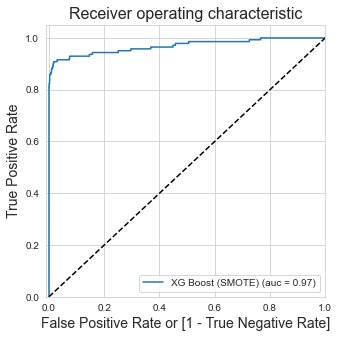

In [127]:
draw_roc('XG Boost (SMOTE)', y_test, y_test_pred_prob)

### 4.2.3 ADASYN (Adaptive Synthetic Sampling Method)

#### Print the class distribution after applying ADASYN

In [129]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)

In [130]:
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns=X_train_pt.columns)

### 4.2.3.1 Decision Tree (Balanced Data) with ADASYN

In [131]:
classifier = DecisionTreeClassifier(random_state=100)
parameters = {
    'max_depth': list(range(2, 4, 1)),          # max depth of the tree
    'min_samples_leaf': list(range(7, 9, 1)),   # min samples in leaf to split the node of the tree
    'min_samples_split': list(range(7, 9, 1)),  # min samples in a node to split the node of the tree
    'criterion': ['entropy','gini']}            # homogeneity measure

model_cv = hyper_tuning(X_train_adasyn, y_train_adasyn, parameters, classifier, True, True) # StratifiedKFold & grid search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.0min finished


------------------------------------------------------------
Best AUC:  0.9148769067508494
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 7}
------------------------------------------------------------


In [132]:
y_train_pred = model_cv.predict(X_train_adasyn)
y_train_pred_prob = model_cv.predict_proba(X_train_adasyn)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_dt_ada = y_test_pred_prob

train_scores = print_scores('Decision Tree: Train Result', y_train_adasyn, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[157561  40716]
 [ 17513 180792]]

Recall Score: 0.9117
Precision Score: 0.8162
F1 Score: 0.8613
Accuracy Score: 0.8532
AUC: 0.9136
------------------------------------------------------------
------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[67599 17377]
 [    6   136]]

Recall Score: 0.9577
Precision Score: 0.0078
F1 Score: 0.0154
Accuracy Score: 0.7958
AUC: 0.9428
------------------------------------------------------------


In [133]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT_ADASYN, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


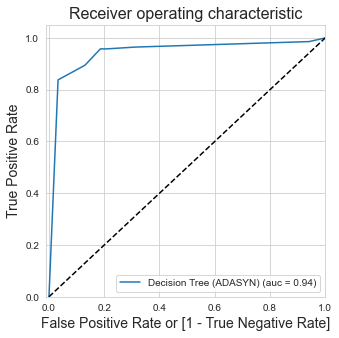

In [134]:
draw_roc('Decision Tree (ADASYN)', y_test, y_test_pred_prob)

### 4.2.3.2 Random Forest (Balanced Data) with ADASYN

In [135]:
classifier = RandomForestClassifier(random_state=100)
parameters = {
    'max_depth': [3],              # max depth of the tree
    'min_samples_leaf': [7],       # min samples in leaf to split the node of the tree
    'min_samples_split': [7],      # min samples in a node to split the node of the tree
    'criterion': ['entropy'],      # homogeneity measure
    'n_estimators': [200, 300],    # No. of trees
    'max_features': [15,20]        # Max no. of features to consider for a split
    }                   

model_cv = hyper_tuning(X_train_adasyn, y_train_adasyn, parameters, classifier, True, False) # StratifiedKFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 69.9min finished


------------------------------------------------------------
Best AUC:  0.9580736130675159
Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 15, 'max_depth': 3, 'criterion': 'entropy'}
------------------------------------------------------------


In [136]:
y_train_pred = model_cv.predict(X_train_adasyn)
y_train_pred_prob = model_cv.predict_proba(X_train_adasyn)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_rf_ada = y_test_pred_prob

train_scores = print_scores('Random Forest: Train Result', y_train_adasyn, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
Random Forest: Train Result

Confusion matrix:
 [[180848  17429]
 [ 37234 161071]]

Recall Score: 0.8122
Precision Score: 0.9024
F1 Score: 0.8549
Accuracy Score: 0.8622
AUC: 0.9576
------------------------------------------------------------
------------------------------------------------------------
Random Forest: Test Result

Confusion matrix:
 [[77447  7529]
 [   10   132]]

Recall Score: 0.9296
Precision Score: 0.0172
F1 Score: 0.0338
Accuracy Score: 0.9114
AUC: 0.9711
------------------------------------------------------------


In [137]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF_ADASYN, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


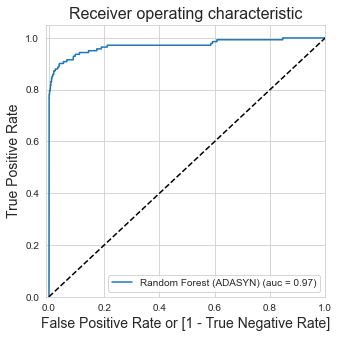

In [138]:
draw_roc('Random Forest (ADASYN)', y_test, y_test_pred_prob)

### 4.2.3.3 XG Boost (Balanced Data) with ADASYN

In [139]:
classifier = XGBClassifier(random_state=100)

parameters = {
    'max_depth': [3,4,5,6,7,8,9],              # max depth of the tree
    'learning_rate': [0.05, 0.08, 0.1, 0.5, 0.6]  # Regularization parameter
    }                   

model_cv = hyper_tuning(X_train_adasyn, y_train_adasyn, parameters, classifier, True, False) # StratifiedKFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 51.8min finished


------------------------------------------------------------
Best AUC:  0.9999955482190952
Best hyperparameters:  {'max_depth': 4, 'learning_rate': 0.6}
------------------------------------------------------------


In [140]:
y_train_pred = model_cv.predict(X_train_adasyn)
y_train_pred_prob = model_cv.predict_proba(X_train_adasyn)[:, 1]

y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]

# save the probs in a variable
y_test_pred_prob_xgb_ada = y_test_pred_prob

train_scores = print_scores('XGBoost: Train Result', y_train_adasyn, y_train_pred, y_train_pred_prob)
test_scores = print_scores('XGBoost: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------
XGBoost: Train Result

Confusion matrix:
 [[198277      0]
 [     0 198305]]

Recall Score: 1.0000
Precision Score: 1.0000
F1 Score: 1.0000
Accuracy Score: 1.0000
AUC: 1.0000
------------------------------------------------------------
------------------------------------------------------------
XGBoost: Test Result

Confusion matrix:
 [[84948    28]
 [   30   112]]

Recall Score: 0.7887
Precision Score: 0.8000
F1 Score: 0.7943
Accuracy Score: 0.9993
AUC: 0.9682
------------------------------------------------------------


In [141]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB_ADASYN, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


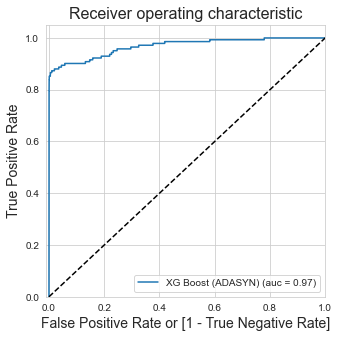

In [142]:
draw_roc('XG Boost (ADASYN)', y_test, y_test_pred_prob)

In [152]:
# print the models based on the high RECALLs
results.sort_values(by=['Recall (Test)', 'AUC (Test)', 'F1 (Test)'], ascending=False)

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
16,"DT_ADASYN, Balanced, cutoff=0.5, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.91,0.94,0.86,0.020,0.91,0.960,0.91,0.94
17,"RF_ADASYN, Balanced, cutoff=0.5, n_estimators=200, min_samples_split=7, min_samples_leaf=7, max_features=15, max_depth=3, criterion=entropy",0.96,0.97,0.85,0.030,0.81,0.930,0.96,0.97
13,"DT_SMOTE, Balanced, cutoff=0.5, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.97,0.96,0.93,0.040,0.93,0.890,0.97,0.96
14,"RF_SMOTE, Balanced, cutoff=0.5, n_estimators=200, min_samples_split=7, min_samples_leaf=7, max_features=15, max_depth=3, criterion=entropy",0.99,0.98,0.93,0.350,0.88,0.850,0.99,0.98
11,"RF_ROS, Balanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=15, max_depth=3, criterion=entropy",0.99,0.97,0.94,0.360,0.90,0.830,0.99,0.97
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98
15,"XGB_SMOTE, Balanced, cutoff=0.5, max_depth=5, learning_rate=0.5",1.00,0.97,1.00,0.830,1.00,0.810,1.00,0.97
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
12,"XGB_ROS, Balanced, cutoff=0.5, max_depth=4, learning_rate=0.6",1.00,0.97,1.00,0.830,1.00,0.800,1.00,0.97
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95


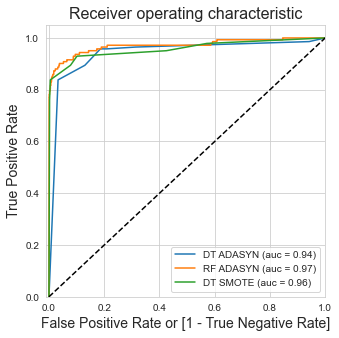

In [156]:
# draw ROC curves for the top 3 models
models_results = {
    'DT ADASYN': y_test_pred_prob_dt_ada,
    'RF ADASYN': y_test_pred_prob_rf_ada,
    'DT SMOTE': y_test_pred_prob_dt_smote
}

draw_roc_top_n(models_results, y_test)

-------------------------------------------------------------------------------------------------
### Perform the best oversampling method on the best model
- Oversampling method: **ADASYN**
- Model: **Decision Tree**
- Metric: **Recall**
-------------------------------------------------------------------------------------------------

In [157]:
#initialise the model with optimum hyperparameters
clf = DecisionTreeClassifier(random_state=100, max_depth=3, min_samples_leaf=7, min_samples_split=7, criterion='gini') 

# fit on the balanced dataset
clf.fit(X_train_adasyn,y_train_adasyn) 

# predict on train set
y_train_pred = clf.predict(X_train_adasyn)
y_train_pred_prob = clf.predict_proba(X_train_adasyn)[:,1]

# predict on train set
y_test_pred = clf.predict(X_test_pt)
y_test_pred_prob = clf.predict_proba(X_test_pt)[:,1]

# print best metric
best_recall = metrics.recall_score(y_test,y_test_pred)
print('Best recall:', best_recall) #print the evaluation score on the X_test by choosing the best evaluation metric

Best recall: 0.9577464788732394


### Print the important features of the best model to understand the dataset

Top var (Index) = 14
2nd Top var (Index) = 4
3rd Top var (Index) = 8


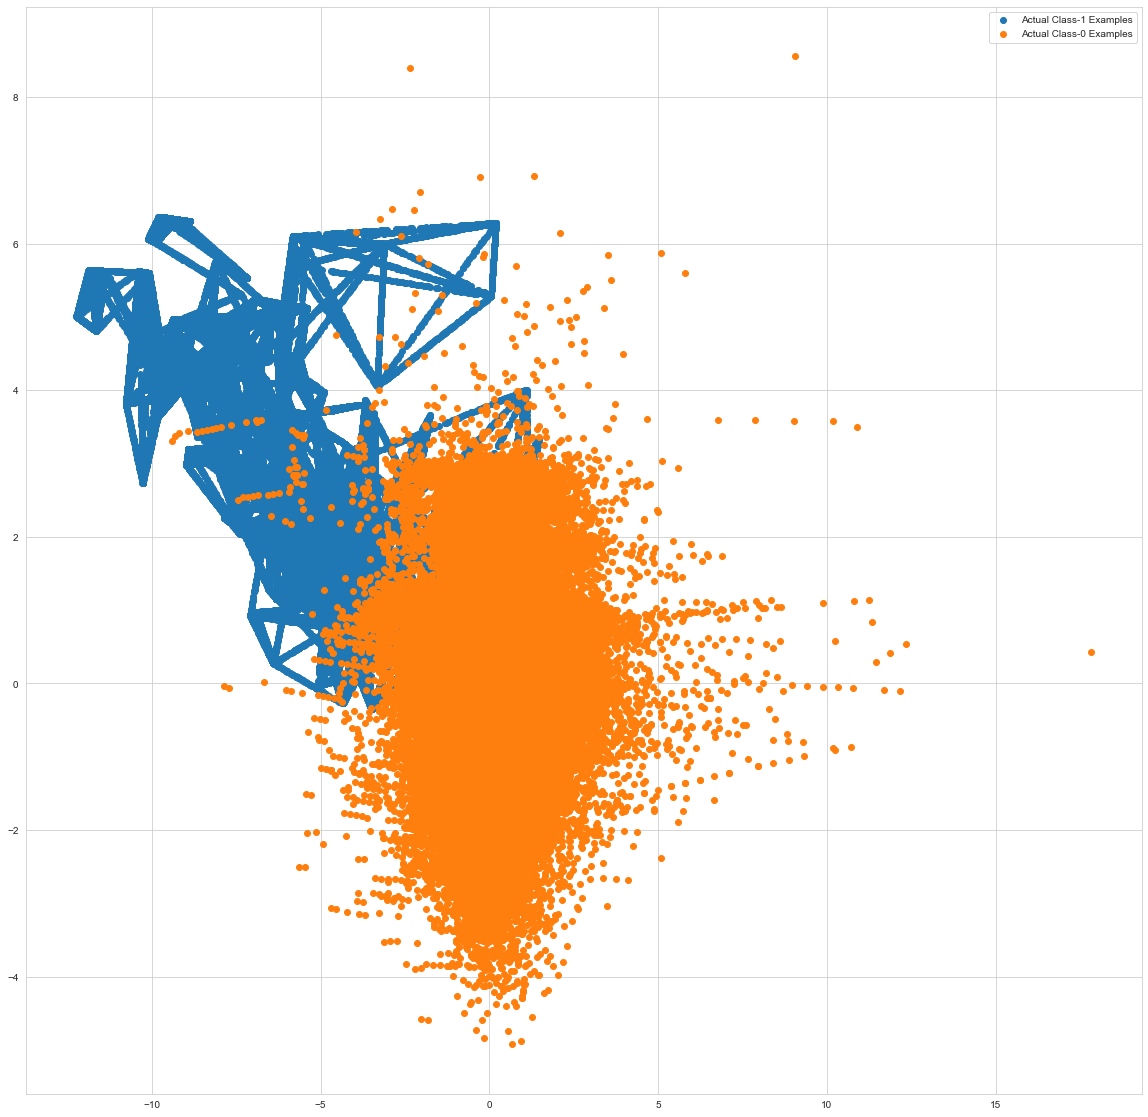

In [158]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var (Index) =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var (Index) =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var (Index) =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]
X_train_0 = X_train_smote.to_numpy()[np.where(y_train_smote==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

plt.show()

-------------------------------------------------------------------------------------------------
#### Print the FPR,TPR & select the best threshold from the roc curve
-------------------------------------------------------------------------------------------------

In [159]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn,y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_prob,drop_intermediate = False)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best threshold from ROC curve:',threshold)


Train auc = 0.9135586522840184
Best threshold from ROC curve: 0.5783147459727386


-------------------------------------------------------------------------------------------------
## 5. Cost Analysis
-------------------------------------------------------------------------------------------------

In [160]:
total_fraud_amount = df['Amount'].loc[df['Class']==1].sum()
fraud_amt_saved = total_fraud_amount*best_recall
print('Out of {0} Euros, {1} Euros can be saved using this model.'.format(total_fraud_amount.round(0),fraud_amt_saved.round(0)))
print('{0} % of the total fraud amount can be saved.'.format(round(100*(fraud_amt_saved/total_fraud_amount),2)))

Out of 58591.0 Euros, 56116.0 Euros can be saved using this model.
95.77 % of the total fraud amount can be saved.
